In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# LogisticRegression feature selection

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, stratify=cancer.target, random_state=42)
print(X_train.shape)

(426, 30)


# Zad

Wykonaj algorytm LogisticRegression z 

* C = 1


In [3]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


* Domyślna wartość C = 1 zapewnia całkiem dobrą wydajność 95% dokładnością zarówno na treningu jak i na teście. 

* Ale ponieważ trening i wydajność zestawu testów są bardzo bliskie to pewnie da się uzyskać leprzy wynik. 

* Spróbujmy zwiększyć C, aby dopasować bardziej elastyczny model:

# Zad

Wykonaj algorytm LogisticRegression z 

* C = 100


In [4]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


* Używanie C = 100 dostajemy wyższą dokładność na treningu, a także nieznacznie zwiększoną dokładność na teście potwierdzając naszą intuicję, że bardziej złożony model powinien działać lepiej. 

* Możemy również zbadać, co się stanie, jeśli użyjemy jeszcze bardziej uporządkowanego modelu niż domyślny C = 1, ustawiając C = 0.01:

# Zad

Wykonaj algorytm LogisticRegression z 

* C = 0.01


In [5]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))

print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


# Zad

Na koniec spójrzmy na współrzędne wykorzystywane przez modele z trzema różnymi ustawieniami parametru regularyzacji C

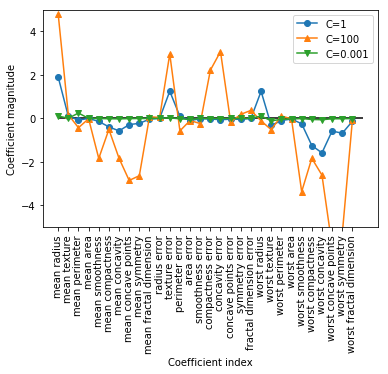

In [6]:
plt.plot(logreg.coef_.T, 'o-', label="C=1")
plt.plot(logreg100.coef_.T, '^-', label="C=100")
plt.plot(logreg001.coef_.T, 'v-', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

In [7]:
logreg.coef_

array([[ 1.90876683e+00,  9.98788148e-02, -7.65567571e-02,
         1.30875965e-03, -1.36948317e-01, -3.86693503e-01,
        -5.71948682e-01, -2.83323656e-01, -2.23813863e-01,
        -3.50526844e-02,  3.04455316e-03,  1.25223693e+00,
         9.49523571e-02, -9.63789785e-02, -1.32044174e-02,
        -2.43125981e-02, -5.86034313e-02, -3.35199227e-02,
        -4.10795998e-02,  1.53205924e-03,  1.24707244e+00,
        -3.19709151e-01, -9.61881472e-02, -2.66335879e-02,
        -2.44041661e-01, -1.24420873e+00, -1.58319440e+00,
        -5.78354663e-01, -6.80060645e-01, -1.30760323e-01]])

In [8]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l2").fit(X_train, y_train)
    print(lr_l1.coef_.T)

[[ 2.45129209e-02]
 [-7.42613425e-03]
 [ 9.92013578e-02]
 [ 1.43274527e-02]
 [-5.88699883e-05]
 [-1.44269822e-03]
 [-2.23989627e-03]
 [-8.71816713e-04]
 [-8.49410110e-05]
 [ 4.71791374e-05]
 [ 3.59376216e-04]
 [ 1.40721366e-03]
 [-3.57217860e-03]
 [-2.68798006e-02]
 [-1.89282293e-05]
 [-4.01548406e-04]
 [-5.41522724e-04]
 [-1.23003856e-04]
 [-6.63979329e-05]
 [-2.90354853e-05]
 [ 2.51620632e-02]
 [-3.01091141e-02]
 [ 5.54401951e-02]
 [-2.81055788e-02]
 [-2.53503168e-04]
 [-5.42476754e-03]
 [-6.97296322e-03]
 [-1.79474904e-03]
 [-9.72493674e-04]
 [-3.48342347e-04]]
[[ 1.90876683e+00]
 [ 9.98788148e-02]
 [-7.65567571e-02]
 [ 1.30875965e-03]
 [-1.36948317e-01]
 [-3.86693503e-01]
 [-5.71948682e-01]
 [-2.83323656e-01]
 [-2.23813863e-01]
 [-3.50526844e-02]
 [ 3.04455316e-03]
 [ 1.25223693e+00]
 [ 9.49523571e-02]
 [-9.63789785e-02]
 [-1.32044174e-02]
 [-2.43125981e-02]
 [-5.86034313e-02]
 [-3.35199227e-02]
 [-4.10795998e-02]
 [ 1.53205924e-03]
 [ 1.24707244e+00]
 [-3.19709151e-01]
 [-9.618814

* Ponieważ LogisticRegression domyślnie stosuje regularyzację L2, wynik wygląda podobnie do tego uzyskanego przez Ridge. 

* Silniejsza regularyzacja przesuwa współczynniki coraz bardziej w kierunku zera, chociaż współczynniki nigdy nie stają się dokładnie zerowe. 

* Sprawdzając dokładniej wykres, możemy również zobaczyć interesujący efekt w trzecim współczynniku dla "mean perimeter". 

* Dla C = 100 i C = 1 współczynnik jest ujemny, natomiast dla C = 0,001 współczynnik jest dodatni, z wielkość, która jest nawet większa niż dla C = 1. 

* Interpretując taki model, można by sądzić, że współczynnik mówi nam, z którą klasą jest związana współrzędne. 

* Jednak zmiana znaku w współczynniku "mean perimeter" oznacza, że w zależności od tego, na który model patrzymy, wysoki "mean perimeter" może być uznany za klasę 0 lub 1 (Czyli nie daje żdnej informacji).

* Jeśli chcemy mieć bardziej interpretowalny model, może pomóc regulacja L1, ponieważ ogranicza on model do korzystania tylko z kilku współrzędnych. 

* Oto wykres współczynników i dokładności klasyfikacji dla regulacji L1:

# Zad

Narysuj wykre współrzędnych wykorzystywane przez modele z trzema różnymi ustawieniami parametru regularyzacji C i regularyzacją L1.

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


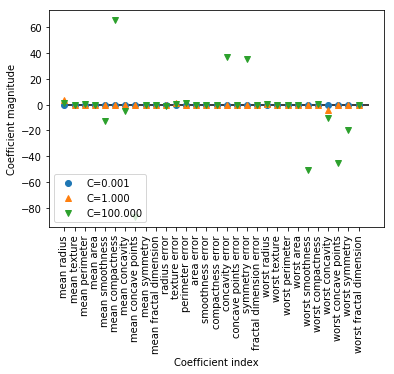

In [10]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
# plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

In [22]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print(lr_l1.coef_.T)

[[ 0.        ]
 [ 0.        ]
 [ 0.0573098 ]
 [ 0.0049403 ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.00987499]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
[[ 3.42213627]
 [ 0.07823913]
 [-0.13161528]
 [-0.01141187]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.40399043]
 [ 0.        ]
 [-0.09281745]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.08760688]
 [-0.32468431]
 [-0.05857668]
 [-0.01788478]
 [ 0.        ]
 [ 0.        ]
 [-3.80481495]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
[[ 8.94348315e-01]
 [-1.94677519e-01]
 [ 1.14751051e-01]
 [-5.22881723e-03]
 [-1.24802677e+01]
 [ 